# SARIMA

Apakah kamu pernah mendengar tentang prediksi penjualan atau peramalan data? Bayangkan kamu adalah seorang pemilik toko yang ingin tahu berapa banyak barang yang harus dibeli untuk bulan depan agar tidak kehabisan stok. Bagaimana kamu bisa tahu? Di sinilah SARIMA datang membantu!

SARIMA adalah singkatan dari Seasonal Autoregressive Integrated Moving Average. Ini adalah metode yang digunakan untuk memprediksi nilai di masa depan berdasarkan data yang sudah ada sebelumnya. SARIMA sangat bagus untuk data yang memiliki pola musiman, seperti penjualan bulanan.

### Fungsi SARIMA
Pikirkan SARIMA sebagai alat untuk menghitung dan menebak seberapa banyak barang yang akan terjual di bulan-bulan berikutnya. Berikut adalah langkah-langkah bagaimana SARIMA bekerja:
1. Mempelajari Data Sebelumnya: SARIMA melihat data penjualan bulan-bulan sebelumnya untuk menemukan pola. Misalnya, jika kamu melihat bahwa penjualan selalu meningkat di bulan Desember karena Natal, SARIMA akan mencatat hal itu.
2. Menghilangkan Tren dan Pola: Sebelum membuat prediksi, SARIMA bisa membantu menghilangkan tren yang tidak diinginkan (seperti penjualan yang selalu naik) dan pola musiman (seperti penjualan yang meningkat setiap akhir tahun).
3. Membuat Prediksi: Setelah mempelajari data dan menghilangkan pola yang tidak perlu, SARIMA akan membuat prediksi untuk bulan-bulan berikutnya. Misalnya, setelah melihat data sebelumnya, SARIMA mungkin menyimpulkan bahwa pada bulan Januari, penjualan diperkirakan akan mencapai 500 unit.
4. Mengukur Ketepatan: Setelah prediksi dilakukan, SARIMA bisa membandingkan hasil prediksinya dengan data asli untuk melihat seberapa akurat prediksinya. Jika akurat, itu berarti SARIMA melakukan pekerjaan dengan baik!

In [1]:
import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt 
from statsmodels.tsa.statespace.sarimax import SARIMAX 
from statsmodels.tsa.stattools import adfuller 
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 1. Penggunaan Data

In [2]:
try:
    df = pd.read_csv("coffeshop.csv", sep=",") 
    sales_data = df[['date', 'money']] 
    sales_data = pd.DataFrame(sales_data) 
    sales_data['date'] = pd.to_datetime(sales_data['date']) 
    display(sales_data)
    print(sales_data.head(10))
except FileNotFoundError:
    print("Tidak dapat membaca")

,date,money
0,2024-03-01,38.70
1,2024-03-01,38.70
2,2024-03-01,38.70
3,2024-03-01,28.90
4,2024-03-01,38.70
...,...,...
2170,2024-10-31,35.76
2171,2024-10-31,35.76
2172,2024-10-31,30.86
2173,2024-10-31,35.76


        date  money
0 2024-03-01   38.7
1 2024-03-01   38.7
2 2024-03-01   38.7
3 2024-03-01   28.9
4 2024-03-01   38.7
5 2024-03-01   33.8
6 2024-03-01   38.7
7 2024-03-01   33.8
8 2024-03-01   38.7
9 2024-03-01   33.8


In [11]:
# kita ambil "Order Date" untuk dijadikan sebagai index
df1 = sales_data.set_index('date') 

# coba ambil data bulanan menjadi sample dan kemudian kita hitung rata-rata setiap bulan
penjualan_harian = df1.resample('D').mean() 
penjualan_harian = penjualan_harian.tail(30)

print(penjualan_harian)

                money
date                 
2024-10-02  33.978182
2024-10-03  33.922500
2024-10-04  29.771111
2024-10-05  29.226667
2024-10-06  32.820000
2024-10-07  33.310000
2024-10-08  32.493333
2024-10-09  30.451667
2024-10-10  32.493333
2024-10-11  32.179231
2024-10-12  30.860000
2024-10-13  30.315556
2024-10-14  33.003750
2024-10-15  32.221111
2024-10-16  31.560000
2024-10-17  34.593333
2024-10-18  34.780000
2024-10-19  35.215556
2024-10-20  34.228750
2024-10-21  32.407368
2024-10-22  30.315556
2024-10-23  31.990769
2024-10-24  33.146667
2024-10-25  31.513333
2024-10-26  32.085000
2024-10-27  33.800000
2024-10-28  33.310000
2024-10-29  32.765556
2024-10-30  32.697500
2024-10-31  33.800000


# 2. Visualisasikan Data Bulanan Tersebut

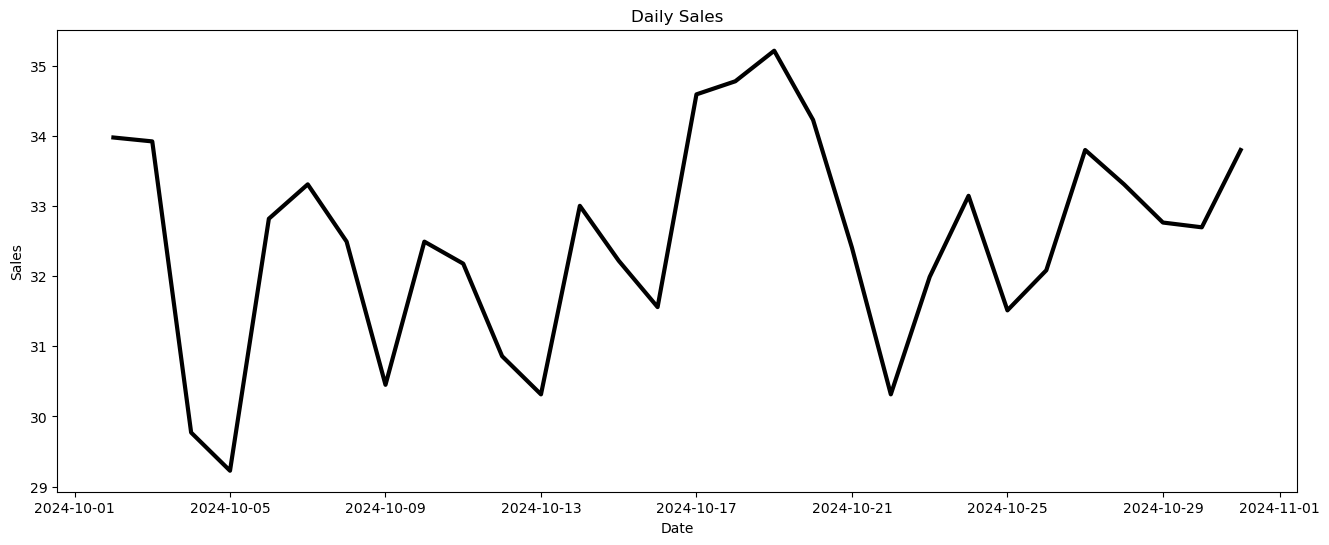

In [4]:
plt.figure(figsize=(16, 6)) 
plt.plot(penjualan_harian['money'], linewidth=3, c='black') 
plt.title("Daily Sales") 
plt.xlabel("Date") 
plt.ylabel("Sales") 
plt.show()

# 3. Lakukan Uji Statistioner

Langkah ini untuk menguji apakah data sudah statistik atau belum:
- Kalau datanya stasioner, artinya polanya tidak berubah terlalu banyak dari waktu ke waktu. Misalnya, penjualan naik atau turun tetapi rata-rata dan bentuk grafiknya tetap sama sepanjang waktu.
- Kalau datanya tidak stasioner, maka grafiknya bisa naik terus, turun terus, atau punya pola yang berubah-ubah, misalnya lebih tinggi di bulan tertentu dan lebih rendah di bulan lainnya.

Cara uji statistioner dapat dilakukan secara langsung dengan melihat grafiknya, tetapi ada juga penggunaan rumus untuk melihat apakah data sudah statistioner atau belum yaitu menggunakan teknik Augmented Dickey-Fuller (ADF).

### Hasil Uji:

Hasil uji menggunakan metode ADF sama seperti uji statistik, semakin ADF statictik jauh dari 0 maka data tersebut semakin stabil.

Hasil uji tersebut terbagi menjadi:
- jika p-value < 0,05 => data hasil uji stabil (Stationary)
- jika p-value > 0,05 => data hasil uji tidak stabil (Non Stationeary)

Selain itu, melihat dari data "Staionary" juga lebih baik. Nilai hasil "Stationary" harus lebih kecil dari nilai ADF, semakin kecil, menunjukkan data statisioner

In [5]:
def check_stationarity(timeseries): 
    result = adfuller(timeseries, autolag='AIC') 
    p_value = result[1]
    print(f'ADF Statistic: {result[0]}') 
    print(f'p-value: {p_value}') 
    print(f'Statisioner: {result[4]}')
    if p_value < 0.05:
        Stasioner = 'stasioner'
    else:
        Stasioner = 'Non-stasioner'
    print(f'Disimpulkan berdasarkan analsisi ADF, P-Value, dan statisioner maka, hasilnya adalah {Stasioner}' )
    

check_stationarity(penjualan_harian['money'])

ADF Statistic: -3.4942436745312047
p-value: 0.00813616523105117
Statisioner: {'1%': -3.6790595944893187, '5%': -2.9678817237279103, '10%': -2.6231583472057074}
Disimpulkan berdasarkan analsisi ADF, P-Value, dan statisioner maka, hasilnya adalah stasioner


# 4. Tentukan Parameter SARIMA

## Pada SARIMA, kita mengenal:
### p 
- p menunjukkan model akan "menggunakan berapa data bulan ke belakang untuk memprediksi bulan depan". Semakin besar p, semakin banyak bulan yang dilihat.

### d 
- d adalah “differencing” untuk menghilangkan tren.
- Bayangkan kamu punya data penjualan yang setiap bulan cenderung selalu naik terus menerus. d ini berfungsi untuk mengurangi atau menghilangkan tren kenaikan tersebut supaya datanya jadi lebih stabil dan tidak terlalu miring ke atas atau ke bawah.
- Cara kerja: Misalnya, kalau d=1, kita mengurangi setiap nilai dengan nilai sebelumnya. Jadi, kalau bulan ini penjualannya naik dari bulan sebelumnya, kita cuma lihat selisihnya, bukan jumlah totalnya.
- Gunanya: Untuk menghilangkan tren naik atau turun yang konsisten

### q 
- q mirip dengan p, tetapi pada q melihat kesalahan model dari bulan-bulan sebelumnya, jadi kalau ada salah di satu bulan, model bisa belajar dari kesalahan itu.

### P
- memiliki fungsi yang sama dengan p, tetapi pada P melihat pola tahunan

### D 
- D adalah “differencing” untuk menghilangkan pola musiman.
- Ini bekerja pada pola yang berulang setiap musim. Misalnya, jika penjualan selalu naik di akhir tahun, itu adalah pola musiman tahunan.
- D membantu menghilangkan pola berulang ini dengan membandingkan nilai saat ini dengan nilai yang sama di musim sebelumnya. Jika musimnya tahunan dan data bulanan, maka kita bandingkan nilai sekarang dengan nilai 12 bulan sebelumnya.
- Contoh: Kalau D=1, kita akan melihat perbedaan nilai penjualan dengan nilai satu tahun sebelumnya (12 bulan lalu).

### Q 
- Q mirip dengan q, tetapi pada Q melihat pola tahunan.

### S
- s adalah jumlah bulan dalam satu musim. Kalau data kamu bulanan dan pola musimnya tahunan, maka s=12.

In [19]:
from pmdarima import auto_arima
train_size = int(len(penjualan_harian) * 0.8)
train = penjualan_harian[:train_size]  
print(train)
model_auto = auto_arima(train, seasonal=True, m=5, stepwise=True, trace=True)
print(model_auto.summary())

                money
date                 
2024-10-02  33.978182
2024-10-03  33.922500
2024-10-04  29.771111
2024-10-05  29.226667
2024-10-06  32.820000
2024-10-07  33.310000
2024-10-08  32.493333
2024-10-09  30.451667
2024-10-10  32.493333
2024-10-11  32.179231
2024-10-12  30.860000
2024-10-13  30.315556
2024-10-14  33.003750
2024-10-15  32.221111
2024-10-16  31.560000
2024-10-17  34.593333
2024-10-18  34.780000
2024-10-19  35.215556
2024-10-20  34.228750
2024-10-21  32.407368
2024-10-22  30.315556
2024-10-23  31.990769
2024-10-24  33.146667
2024-10-25  31.513333
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[5] intercept   : AIC=94.066, Time=0.26 sec
 ARIMA(0,0,0)(0,0,0)[5] intercept   : AIC=94.907, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[5] intercept   : AIC=95.070, Time=0.16 sec
 ARIMA(0,0,1)(0,0,1)[5] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[5]             : AIC=237.070, Time=0.01 sec
 ARIMA(2,0,2)(0,0,1)[5] intercept   : AIC=93.714, Time=0.27 sec
 AR

In [ ]:
p, d, q = 1, 1, 1
P, D, Q, s = 1, 1, 1, 12

# 5. Latih Model SARIMA

In [ ]:
model = SARIMAX(penjualan_harian, order=(p, d, q), seasonal_order=(P, D, Q, s)) 
results = model.fit()
model

# 6. Prediksi Periode Mendatang dengan SARIMA

In [ ]:
Periode = 12 
Prediksi = results.get_forecast(steps=Periode) 
Rata_Prediksi = Prediksi.predicted_mean 
Confiden_Interval_Prediksi = Prediksi.conf_int()
print("Rata-rata Prediksi Harian:")
display(Rata_Prediksi)

# Menampilkan interval kepercayaan untuk setiap prediksi
print("\nInterval Kepercayaan Prediksi (Lower, Upper):")
display(Confiden_Interval_Prediksi)

## Hasil Prediksi Berdasarkan Kepercayaan Rata-Rata

In [ ]:
plt.figure(figsize=(12, 6)) 
plt.plot(penjualan_harian, label='Data Sebelumnya', color='black') 
plt.plot(Rata_Prediksi, label='Prediksi', color='red') 
plt.title("Sales Forecast") 
plt.xlabel("Date") 
plt.ylabel("Sales") 
plt.legend() 
plt.show()

## Hasil Prediksi Berdasarkan Maximum dan Minimum Prediksi

In [ ]:
plt.figure(figsize=(12, 6)) 
plt.plot(penjualan_harian, label='Data Sebelumnya', color='black') 
plt.plot(Rata_Prediksi, label='Prediksi', color='red') 
plt.fill_between(Confiden_Interval_Prediksi.index, Confiden_Interval_Prediksi.iloc[:, 0], Confiden_Interval_Prediksi.iloc[:, 1], color='pink') 
plt.title("Sales Forecast") 
plt.xlabel("Date") 
plt.ylabel("Sales") 
plt.legend() 
plt.show()

# 7. Lakukan Uji MAE dan MSE

Kita bandingkan data prediksi kita dengan data aktual yang yang kita berikan nama "Data_sebelumnya". Uji tersebut dilakukan dengan uji MAE dan MSE:
### MAE menghitung rata-rata absolut dari error, mengukur deviasi prediksi dari nilai aktual tanpa memperhatikan arah deviasi. Uji MAE seperti:
- Menebak tinggi teman, dan setelah itu kamu melihat seberapa jauh tebakan dari tinggi sebenarnya. Semua selisih ini dihitung, lalu kita ambil rata-ratanya.

### MSE menghitung rata-rata dari error yang dikuadratkan, memperbesar error besar dan mengurangi pengaruh error kecil. Uji MSE seperti:
- Sama seperti MAE tetapi pada MSE menggunakan teknik pengkuadratan seperti (100-10)^2. Sehingga MSE memprediksi kesalahan yang lebih serius, terutama jika ada satu prediksi yang sangat salah. 



In [ ]:
Data_sebelumnya = penjualan_harian[-Periode:] 
print(Data_sebelumnya)
mae = mean_absolute_error(Data_sebelumnya, Rata_Prediksi) 
mse = mean_squared_error(Data_sebelumnya, Rata_Prediksi) 
print(f'MAE: {mae}') 
print(f'MSE: {mse}')


# 8. Lihat Uji dengan Kondisi Asli

Pada kasus ini, gunakan data 12 tahun terakhir untuk memperdiksi kemudian kita lihat seberapa akurat prediksi tersebut dengan hasil asli.
1. train_data untuk menyimpan data yang akan kita latih
2. test_data untuk menyimpan data asli tersebut

In [ ]:
train_data = penjualan_harian[:-12]
test_data = penjualan_harian[-12:]

model = SARIMAX(train_data, order=(p, d, q), seasonal_order=(P, D, Q, s))
results = model.fit()

forecast = results.get_forecast(steps=12)
predicted_mean = forecast.predicted_mean
confidence_interval = forecast.conf_int()

print("\nInterval Kepercayaan Prediksi (Lower, Upper):")
display(confidence_interval, predicted_mean)

mae = mean_absolute_error(test_data, predicted_mean)
mse = mean_squared_error(test_data, predicted_mean)
print(f'MAE: {mae}')
print(f'MSE: {mse}')

plt.figure(figsize=(12, 10)) 
plt.plot(penjualan_harian, label='Data Sebelumnya', color='black') 
plt.plot(predicted_mean, label='Prediksi', color='red') 
plt.fill_between(confidence_interval.index, confidence_interval.iloc[:, 0], confidence_interval.iloc[:, 1], color='pink') 
plt.title("Sales Forecast") 
plt.xlabel("Date") 
plt.ylabel("Sales") 
plt.legend() 
plt.show()